### HOUGH TRANSFORMATION FOR ROTATION CORRECTION IN LICENSE PLATE

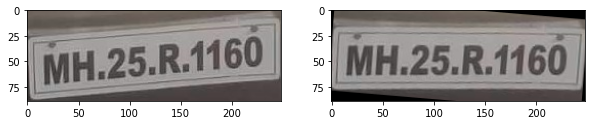

In [12]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
    axs = axs.flatten()
    axs[0].imshow(image)
    axs[1].imshow(result)
    return result

def compute_skew(src_img):

    if len(src_img.shape) == 3:
        h, w, _ = src_img.shape
    elif len(src_img.shape) == 2:
        h, w = src_img.shape
    else:
        print('upsupported image type')

    img = cv2.medianBlur(src_img, 3)

    edges = cv2.Canny(img,  threshold1 = 30,  threshold2 = 100, apertureSize = 3, L2gradient = True)
    lines = cv2.HoughLinesP(edges, 1, math.pi/180, 30, minLineLength=w / 4.0, maxLineGap=h/4.0)
    angle = 0.0
    nlines = lines.size

    #print(nlines)
    cnt = 0
    for x1, y1, x2, y2 in lines[0]:
        ang = np.arctan2(y2 - y1, x2 - x1)
       
        if math.fabs(ang) <= 30: 
            angle += ang
            cnt += 1

    if cnt == 0:
        return 0.0
    return (angle / cnt)*180/math.pi

def deskew(src_img):
    return rotate_image(src_img, compute_skew(src_img))


if __name__ == '__main__':
    import cv2
    img = cv2.imread('/content/12.jpg')
    corrected_img = deskew(img)

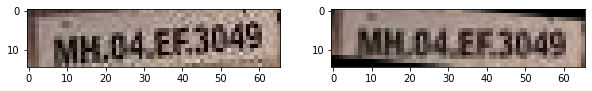

In [13]:
img = cv2.imread('/content/10.jpg')
corrected_img = deskew(img)

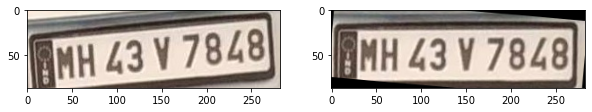

In [14]:
img = cv2.imread('/content/13.jpg')
corrected_img = deskew(img)

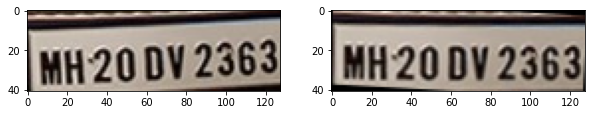

In [15]:
img = cv2.imread('/content/3.jpg')
corrected_img = deskew(img)

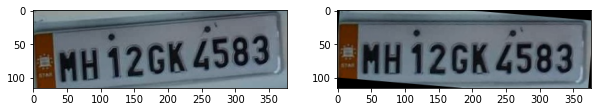

In [16]:
img = cv2.imread('/content/5.jpg')
corrected_img = deskew(img)

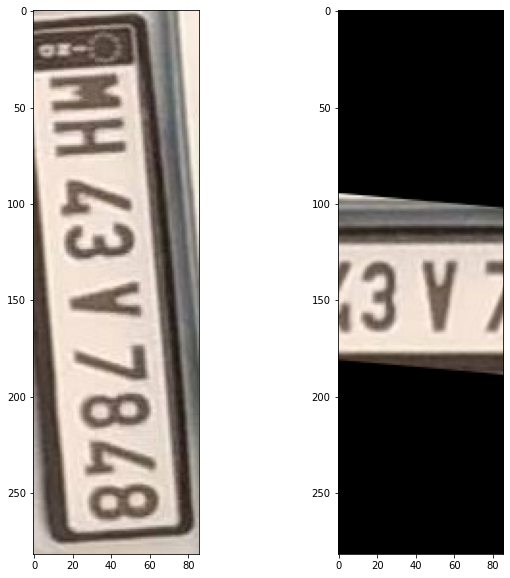

In [17]:
img = cv2.imread('/content/13.jpg')
corrected_img = deskew(img)

By using this method, one cannot correct skew hreater than 45 degrees. From the above  plot, we see that the text is in the correct orientation, but whole license plate is not captured. Hence to resilve this issue, what we can do is that we can maintain a record of angles and if a particular angle is greater than the threshold, then we can manually remove the skewness.